# Limit roads by country

## Code setup

In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load roads data

In [2]:
path_to_roads = os.path.join('.', 'major_roads_with_short_names_merged_precision.geojson')

gdf_short_roads = gpd.read_file(path_to_roads)
gdf_short_roads = gdf_short_roads.set_index('roadNumber')

In [3]:
gdf_short_roads.head()

,function,geometry
roadNumber,,
A1,A Road,"MULTILINESTRING Z ((326000 674000 0, 327000 67..."
A1(M),Motorway,"MULTILINESTRING Z ((422000 506000 0, 421000 50..."
A10,A Road,"MULTILINESTRING Z ((533000 193000 0, 533000 19..."
A11,A Road,"MULTILINESTRING Z ((534000 181000 0, 534000 18..."
A12,A Road,"MULTILINESTRING Z ((537000 185000 0, 536000 18..."


In [4]:
len(gdf_short_roads)

157

## Load country geometry

In [5]:
path_to_countries = os.path.join('..', 'data_geojson', 'ons_data', 'Countries_December_2022_UK_BGC_5172940325493680497.geojson')

gdf_countries = gpd.read_file(path_to_countries)

In [6]:
gdf_countries = gdf_countries.set_index('CTRY22NM')

# Change to same coordinate system as the roads:
gdf_countries = gdf_countries.to_crs('EPSG:27700')

In [7]:
gdf_countries

,FID,CTRY22CD,CTRY22NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
CTRY22NM,,,,,,,,,
England,1,E92000001,Lloegr,394883,370883,-2.07811,53.23497,b740ecb1-1504-4bf5-9151-31309c78e000,"MULTIPOLYGON (((83999.706 5358.603, 83889.796 ..."
Northern Ireland,2,N92000002,Gogledd Iwerddon,86544,535337,-6.85570,54.61501,63cc8829-4eab-4abc-aab8-ef63cc08ff45,"MULTIPOLYGON (((131257.61 468411.48, 131261.23..."
Scotland,3,S92000003,Yr Alban,277744,700060,-3.97094,56.17743,1f6c0081-6c91-46ab-a887-62ddf03f2465,"MULTIPOLYGON (((265944.643 543512.722, 265994...."
Wales,4,W92000004,Cymru,263405,242881,-3.99417,52.06741,33dd7e88-9a76-412f-b1c9-ecf1763b4f03,"MULTIPOLYGON (((322311.509 164638.805, 322288...."


## Limit roads to England:

In [8]:
gdf_roads_england = gdf_short_roads.clip(gdf_countries.loc[['England'], 'geometry'])

gdf_roads_england

,function,geometry
roadNumber,,
A3(M),Motorway,"MULTILINESTRING Z ((469000 107000 0, 469000 10..."
A27,A Road,"MULTILINESTRING Z ((422000 124000 0, 423000 12..."
A29,A Road,"MULTILINESTRING Z ((494000 100000 0, 493000 10..."
A26,A Road,"MULTILINESTRING Z ((547000 119000 0, 547000 11..."
A22,A Road,"MULTILINESTRING Z ((531000 161000 0, 532000 16..."
...,...,...
M55,Motorway,"MULTILINESTRING Z ((335000 434000 0, 336000 43..."
A66,A Road,"MULTILINESTRING Z ((301000 529000 0, 302000 52..."
A69,A Road,"MULTILINESTRING Z ((340000 556000 0, 341000 55..."


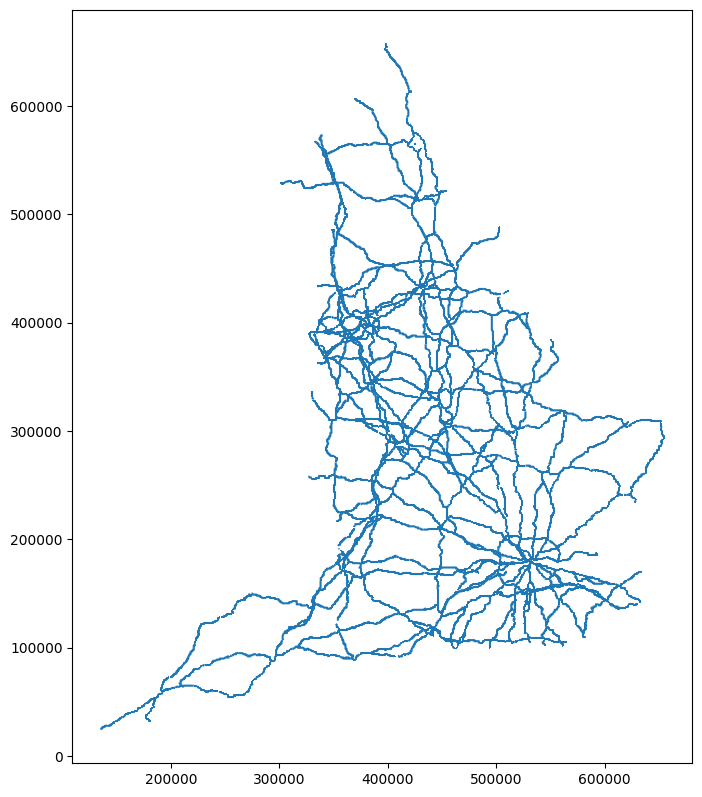

In [9]:
fig, ax = plt.subplots(figsize=(8, 10))

gdf_roads_england.plot(ax=ax)

plt.show()

## Limit roads to Wales:

In [10]:
gdf_roads_wales = gdf_short_roads.clip(gdf_countries.loc[['Wales'], 'geometry'])

gdf_roads_wales

,function,geometry
roadNumber,,
M4,Motorway,"MULTILINESTRING Z ((257000 204000 0, 257000 20..."
M48,Motorway,"MULTILINESTRING Z ((345000 188000 0, 344000 18..."
A40,A Road,"MULTILINESTRING Z ((194000 230000 0, 194000 23..."
A44,A Road,"MULTILINESTRING Z ((259000 282000 0, 259000 28..."
A5,A Road,"MULTILINESTRING Z ((225000 382000 0, 225838.44..."
A48(M),Motorway,"MULTILINESTRING Z ((325000 184000 0, 325000 18..."
A48,A Road,"MULTILINESTRING Z ((241000 219000 0, 242000 21..."
A55,A Road,"MULTILINESTRING Z ((225000 381000 0, 225000 38..."


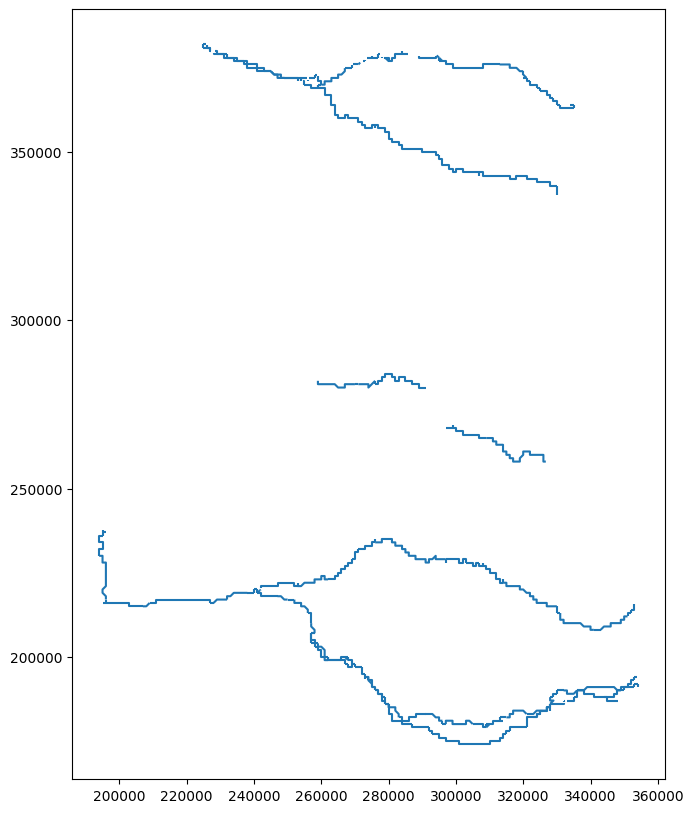

In [11]:
fig, ax = plt.subplots(figsize=(8, 10))

gdf_roads_wales.plot(ax=ax)

plt.show()

## Limit roads to England and Wales:

In [12]:
gdf_roads_englandwales = gdf_short_roads.clip(gdf_countries.loc[['England', 'Wales'], 'geometry'])

gdf_roads_englandwales

,function,geometry
roadNumber,,
A3(M),Motorway,"MULTILINESTRING Z ((469000 107000 0, 469000 10..."
A27,A Road,"MULTILINESTRING Z ((422000 124000 0, 423000 12..."
A29,A Road,"MULTILINESTRING Z ((494000 100000 0, 493000 10..."
A26,A Road,"MULTILINESTRING Z ((547000 119000 0, 547000 11..."
A22,A Road,"MULTILINESTRING Z ((531000 161000 0, 532000 16..."
...,...,...
M55,Motorway,"MULTILINESTRING Z ((335000 434000 0, 336000 43..."
A66,A Road,"MULTILINESTRING Z ((301000 529000 0, 302000 52..."
A69,A Road,"MULTILINESTRING Z ((340000 556000 0, 341000 55..."


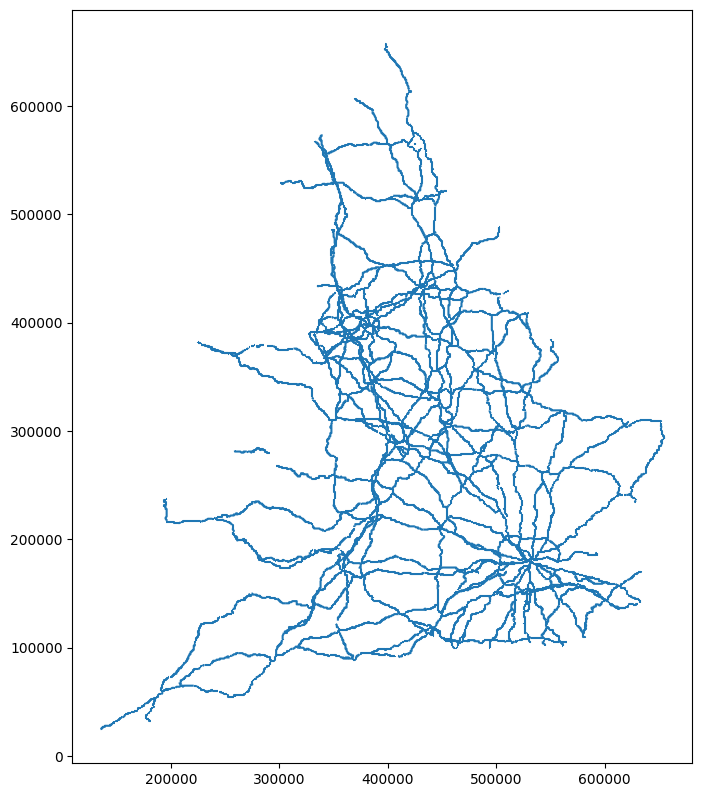

In [13]:
fig, ax = plt.subplots(figsize=(8, 10))

gdf_roads_englandwales.plot(ax=ax)

plt.show()

## Limit roads to Scotland:

In [14]:
gdf_roads_scotland = gdf_short_roads.clip(gdf_countries.loc[['Scotland'], 'geometry'])

gdf_roads_scotland

,function,geometry
roadNumber,,
A1,A Road,"MULTILINESTRING Z ((326000 674000 0, 327000 67..."
A75,A Road,"MULTILINESTRING Z ((212000 559000 0, 211000 55..."
A74(M),Motorway,"MULTILINESTRING Z ((293000 624000 0, 293000 62..."
A76,A Road,"MULTILINESTRING Z ((244000 636000 0, 244000 63..."
A77,A Road,"MULTILINESTRING Z ((200000 554000 0, 200000 55..."
A79,A Road,"MULTILINESTRING Z ((234000 621000 0, 234000 62..."
M74,Motorway,"MULTILINESTRING Z ((259000 663000 0, 259000 66..."
A72,A Road,"MULTILINESTRING Z ((272000 656000 0, 271000 65..."
A70,A Road,"MULTILINESTRING Z ((233000 621000 0, 234000 62..."


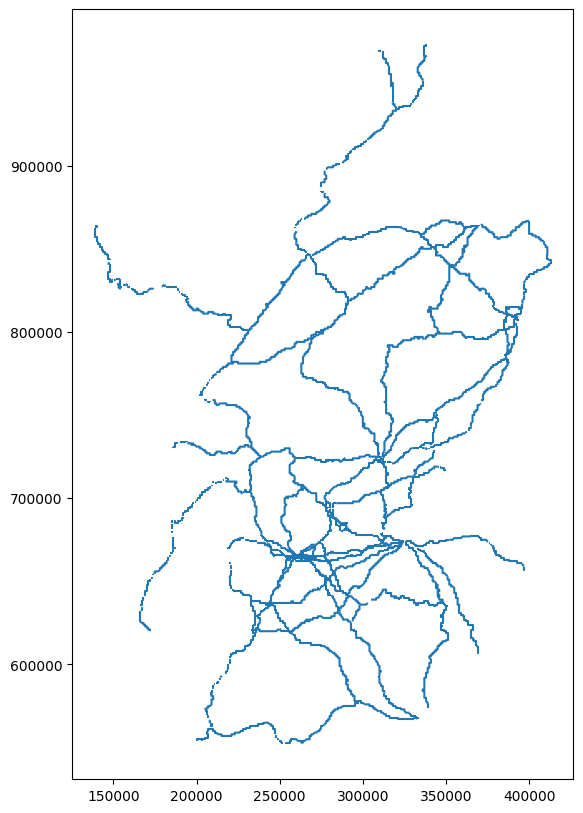

In [15]:
fig, ax = plt.subplots(figsize=(8, 10))

gdf_roads_scotland.plot(ax=ax)

plt.show()

## Save results to file

In [16]:
gdf_roads_england.to_file('major_roads_england.geojson')
gdf_roads_wales.to_file('major_roads_wales.geojson')
gdf_roads_englandwales.to_file('major_roads_englandwales.geojson')
gdf_roads_scotland.to_file('major_roads_scotland.geojson')